In [1]:
from google.cloud import bigquery
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid", palette="pastel")

# Conectando con Big Query

In [2]:
client = bigquery.Client()

## Obteniendo el dataset 'TheLook Ecommerce'

In [3]:
# Referencia a "thelook_ecommerce" dataset
dataset_ref = client.dataset("thelook_ecommerce",
                             project="bigquery-public-data")

# Solicitamos el dataset mediante el API
dataset = client.get_dataset(dataset_ref)

## Listando tablas del dataset

In [4]:
tables = list(client.list_tables(dataset))

for table in tables:
    print(table.table_id)

distribution_centers
events
inventory_items
order_items
orders
products
users


## Ajustando configuración

In [140]:
# Limitamos los queries a 1GB
# En caso el query exceda dicho límite, se cancelará
LIMIT = 1000*1000*1000 #1GB
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=LIMIT)

# Revisando Tablas del dataset

In [141]:
def get_table(table: str):
    """
    Retrieves a BigQuery table reference object by its name.

    Parameters
    ----------
    table : str
        The name of the BigQuery table to retrieve.

    Returns
    -------
    google.cloud.bigquery.table.Table
        A Table object containing metadata and schema of the specified table.
    """
    table_ref = dataset_ref.table(table)
    tbl = client.get_table(table_ref)

    return tbl

## Centros de Distribución

In [7]:
table = get_table('distribution_centers')
client.list_rows(table, max_results=5).to_dataframe()

,id,name,latitude,longitude,distribution_center_geom
0,3,Houston TX,29.7604,-95.3698,POINT(-95.3698 29.7604)
1,7,Philadelphia PA,39.9500,-75.1667,POINT(-75.1667 39.95)
2,9,Charleston SC,32.7833,-79.9333,POINT(-79.9333 32.7833)
3,8,Mobile AL,30.6944,-88.0431,POINT(-88.0431 30.6944)
4,5,New Orleans LA,29.9500,-90.0667,POINT(-90.0667 29.95)


Tabla que contiene información sobre la ubicación de los centros de distribución:
- name: Nombre de las ciudades de US donde se encuentran los centros de distribución
- latitude: Parte de la coordenada para ubicar el centro de distribución en la tierra
- longitud: Parde de la coordenada para ubicar el centro de distribución en la tierra
- distribution_center_geom: Coordenada completa de la posición del centro de distribución

## Eventos

In [8]:
table = get_table('events')
client.list_rows(table, max_results=5).to_dataframe()

,id,user_id,sequence_number,session_id,created_at,ip_address,city,state,postal_code,browser,traffic_source,uri,event_type
0,2057112,<NA>,3,44588dee-32ca-4c5f-947d-2595d8e09e68,2020-05-23 08:39:00+00:00,72.242.212.147,Sapporo,Hokkaido,003-0021,Firefox,Email,/cancel,cancel
1,1666404,<NA>,3,88f91cf8-4c40-4daf-9eff-54a90febdcf9,2025-04-09 11:03:00+00:00,121.205.216.208,Sapporo,Hokkaido,005-0041,Safari,Email,/cancel,cancel
2,2056213,<NA>,3,99a01777-6d25-4452-8259-cfb43d7dab3e,2024-10-26 12:06:00+00:00,157.25.44.229,Sapporo,Hokkaido,007-0890,Safari,Email,/cancel,cancel
3,1768322,<NA>,3,3469aedc-0f1c-4eac-84e6-b7f1cbaeb7d0,2019-03-27 05:46:00+00:00,154.161.133.249,Morioka City,Iwate,020-0866,Chrome,Facebook,/cancel,cancel
4,2079881,<NA>,3,d0014a02-262d-46e5-9827-3f9a42c61eae,2021-07-16 08:42:00+00:00,171.172.148.187,São Paulo,São Paulo,02675-031,Chrome,Facebook,/cancel,cancel


La tabla contiene la secuencia de eventos según identificadores como `user_id` y `session_id`.

## Inventario de Items

In [9]:
table = get_table('inventory_items')
client.list_rows(table, max_results=5).to_dataframe()

,id,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id
0,45113,13844,2024-03-04 10:19:00+00:00,2024-03-10 02:23:00+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
1,45114,13844,2021-11-03 17:11:00+00:00,NaT,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
2,45115,13844,2024-03-02 17:29:00+00:00,NaT,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
3,45116,13844,2024-01-28 06:30:00+00:00,NaT,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
4,71066,13844,2025-03-25 03:16:11+00:00,2025-05-13 12:41:11+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7


La table contiene información relevante acerca de los items que el ecommerce comercializa.

## Items por Orden

In [10]:
table = get_table('order_items')
client.list_rows(table, max_results=5).to_dataframe()

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price
0,96036,66451,52971,14235,259279,Cancelled,2024-02-15 22:45:25+00:00,NaT,NaT,NaT,0.02
1,99967,69140,55088,14235,269943,Cancelled,2025-04-23 10:34:17+00:00,NaT,NaT,NaT,0.02
2,105460,72882,58129,14235,284761,Cancelled,2024-02-14 01:34:48+00:00,NaT,NaT,NaT,0.02
3,178292,123330,98590,14235,481167,Shipped,2021-12-22 02:24:57+00:00,2021-12-24 18:56:00+00:00,NaT,NaT,0.02
4,174494,120682,96502,14159,470911,Processing,2024-08-17 16:39:23+00:00,NaT,NaT,NaT,0.49


La tabla contiene información de los productos comprados por los usuarios, con los respectivos estados, precios, envíos, etc.

## Ordenes

In [11]:
table = get_table('orders')
client.list_rows(table, max_results=5).to_dataframe()

,order_id,user_id,status,gender,created_at,returned_at,shipped_at,delivered_at,num_of_item
0,18,11,Cancelled,F,2023-12-20 00:14:00+00:00,NaT,NaT,NaT,1
1,20,14,Cancelled,F,2024-09-17 15:00:00+00:00,NaT,NaT,NaT,1
2,39,29,Cancelled,F,2024-07-14 02:40:00+00:00,NaT,NaT,NaT,1
3,42,30,Cancelled,F,2020-09-28 11:25:00+00:00,NaT,NaT,NaT,1
4,57,45,Cancelled,F,2023-08-09 00:22:00+00:00,NaT,NaT,NaT,1


La tabla contiene información de la orden efectuada por el usuario y su respectivo estado.

## Productos

In [12]:
table = get_table('products')
client.list_rows(table, max_results=5).to_dataframe()

,id,cost,category,name,brand,retail_price,department,sku,distribution_center_id
0,13842,2.51875,Accessories,Low Profile Dyed Cotton Twill Cap - Navy W39S55D,MG,6.25,Women,EBD58B8A3F1D72F4206201DA62FB1204,1
1,13928,2.33835,Accessories,Low Profile Dyed Cotton Twill Cap - Putty W39S55D,MG,5.95,Women,2EAC42424D12436BDD6A5B8A88480CC3,1
2,14115,4.87956,Accessories,Enzyme Regular Solid Army Caps-Black W35S45D,MG,10.99,Women,EE364229B2791D1EF9355708EFF0BA34,1
3,14157,4.64877,Accessories,Enzyme Regular Solid Army Caps-Olive W35S45D (...,MG,10.99,Women,00BD13095D06C20B11A2993CA419D16B,1
4,14273,6.50793,Accessories,Washed Canvas Ivy Cap - Black W11S64C,MG,15.99,Women,F531DC20FDE20B7ADF3A73F52B71D0AF,1


Columna con la información de cada producto que se vende en los distintos centros de distribución

## Usuarios

In [13]:
table = get_table('users')
client.list_rows(table, max_results=5).to_dataframe()

,id,first_name,last_name,email,age,gender,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at,user_geom
0,54764,Lydia,Wilson,lydiawilson@example.org,40,F,Acre,850 Davis Village,69980-000,null,Brasil,-8.065346,-72.870949,Search,2024-05-02 17:00:00+00:00,POINT(-72.87094866 -8.065346116)
1,12984,Christine,Gay,christinegay@example.com,21,F,Acre,3824 Kristin Streets Apt. 956,69980-000,null,Brasil,-8.065346,-72.870949,Search,2025-01-02 12:45:00+00:00,POINT(-72.87094866 -8.065346116)
2,46589,Paul,Austin,paulaustin@example.net,40,M,Acre,905 Andrea Field,69980-000,null,Brasil,-8.065346,-72.870949,Search,2024-02-05 10:29:00+00:00,POINT(-72.87094866 -8.065346116)
3,82358,James,Sellers,jamessellers@example.net,21,M,Acre,602 Denise Junction,69980-000,null,Brasil,-8.065346,-72.870949,Search,2023-03-21 15:52:00+00:00,POINT(-72.87094866 -8.065346116)
4,36760,Michele,Austin,micheleaustin@example.net,67,F,Acre,685 Caroline Overpass,69980-000,null,Brasil,-8.065346,-72.870949,Search,2022-01-29 09:29:00+00:00,POINT(-72.87094866 -8.065346116)


Tabla con la información de cada usuario del ecommerce. Se almacenan datos importantes como el género, edad, ubicación, etc.

In [14]:
# Tablas
orders_table = 'bigquery-public-data.thelook_ecommerce.orders'
order_items_table = 'bigquery-public-data.thelook_ecommerce.order_items'
users_table = 'bigquery-public-data.thelook_ecommerce.users'
products_table = 'bigquery-public-data.thelook_ecommerce.products'
inventory_items_table ='bigquery-public-data.thelook_ecommerce.inventory_items' 
events_table = 'bigquery-public-data.thelook_ecommerce.events'
distribution_centers = 'bigquery-public-data.thelook_ecommerce.distribution_centers'

In [142]:
def get_query(q: str) -> pd.DataFrame:
    """
    Executes a SQL query using the BigQuery client and returns the results as a DataFrame.

    Parameters
    ----------
    q : str
        A valid SQL query string to execute on BigQuery.

    Returns
    -------
    pd.DataFrame
        A pandas DataFrame containing the result set of the executed query.
    """
    return client.query(q, job_config=safe_config).to_dataframe()

# Conociendo el negocio

## Qué clase de productos vende el negocio?

In [16]:
query = f"""
SELECT DISTINCT category
FROM `{products_table}`
"""
get_query(query)

,category
0,Accessories
1,Plus
2,Swim
3,Active
4,Socks & Hosiery
5,Socks
6,Dresses
7,Pants & Capris
8,Fashion Hoodies & Sweatshirts
9,Skirts


- El ecommerce vende ropa y accesorios

## Qué departamento de productos tiene el negocio?

In [17]:
query = f"""
SELECT DISTINCT department
FROM `{products_table}`
"""
get_query(query)

,department
0,Women
1,Men


- El negocio vende producto para hombres y mujeres

## Cuál es el rango de precio por sus productos?

In [18]:
query = f"""
SELECT 
MIN(retail_price) AS min_price,
MAX(retail_price) AS max_price,
AVG(retail_price) AS avg_price
FROM `{products_table}`
"""
get_query(query)

,min_price,max_price,avg_price
0,0.02,999.0,59.220164


- Cuenta con productos de todas las gamas de precio
- Por lo tanto, contará también con distintos grupos de usuarios según el monto de consumo

## Dónde se encuentran sus usuarios?

In [19]:
query = f"""
SELECT DISTINCT country
FROM `{users_table}`
"""
get_query(query)

,country
0,Brasil
1,Japan
2,United States
3,Colombia
4,Spain
5,China
6,Australia
7,France
8,Germany
9,Belgium


- Cuenta con una amplia cobertura de países donde llegan sus productos.
- No solo en América, sino también Europa, Asia, Oceanía.

## Qué edad tienen sus usuarios?

In [59]:
query = f"""
SELECT 
    age,
FROM `{users_table}`
"""
df_q = get_query(query)

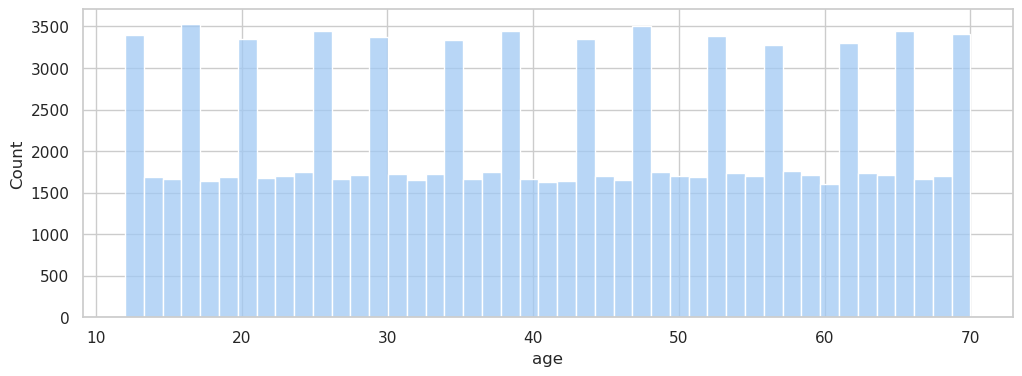

In [81]:
plt.figure(figsize=(12, 4))
sns.histplot(df_q, x='age');

- Los usuarios van desde los 12 hasta los 70 años
- El negocio comprende un público adolescente, juvenil, adulto y adulto mayor

## Cómo conocen los usuarios el negocio?

In [82]:
query = f"""
SELECT DISTINCT traffic_source, COUNT(*) AS count
FROM `{users_table}`
GROUP BY traffic_source
ORDER BY count DESC
"""
df_q = get_query(query)

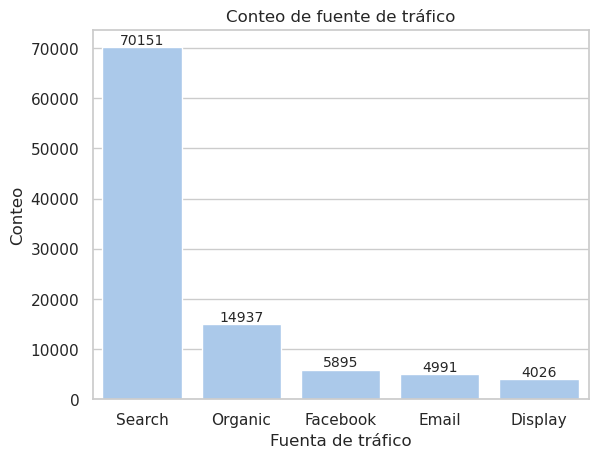

In [85]:
ax = sns.barplot(df_q, x='traffic_source', y='count');
ax.bar_label(ax.containers[0], fontsize=10);
plt.xlabel('Fuenta de tráfico')
plt.ylabel('Conteo')
plt.title('Conteo de fuente de tráfico');

Los usuarios conocen el negocio de 5 maneras distintas, siendo la `búsqueda` la fuente de tráfico con más usuarios atraídos.

## Cuántos usuarios hombres y mujeres maneja el negocio?

In [86]:
query = f"""
SELECT DISTINCT gender, COUNT(*) AS count
FROM `{users_table}`
GROUP BY gender
ORDER BY count DESC
"""
df_q = get_query(query)

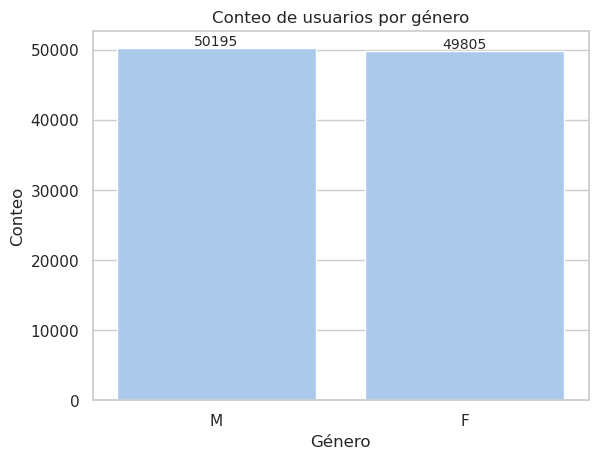

In [88]:
ax = sns.barplot(df_q, x='gender', y='count')
ax.bar_label(ax.containers[0], fontsize=10)
plt.xlabel('Género')
plt.ylabel('Conteo')
plt.title('Conteo de usuarios por género');

- El género masculino es el que tiene más presencia en el negocio
- No muy lejos se encuentran las mujeres

# Analizando el negocio

## Cuántas ventas por año ha obtenido el negocio?

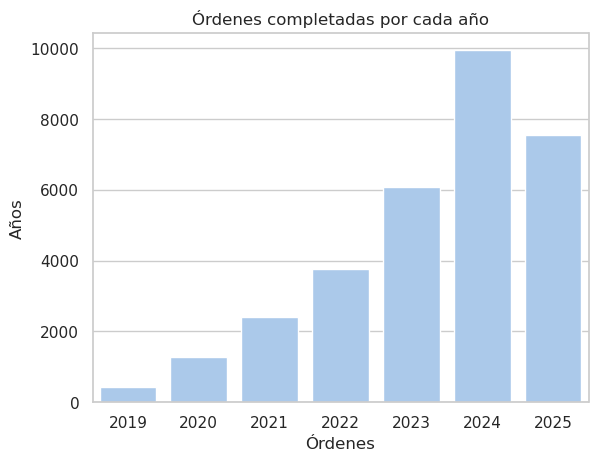

In [23]:
query = f"""
SELECT 
    EXTRACT(YEAR FROM created_at) AS year,
    COUNT(order_id) AS orders,
FROM `{orders_table}`
WHERE status = 'Complete'
GROUP BY year
ORDER BY year DESC
"""
sns.barplot(get_query(query), x='year', y='orders');
plt.title('Órdenes completadas por cada año');
plt.xlabel('Órdenes');
plt.ylabel('Años');

- El negocio con el pasar de años ha ido creciendo.
- Las ventas reflejan un crecimiento de casi el doble en el 2024
- El 2025 parece ser un año igual de prometedor que el 2024 debido a que aún no se ha terminado

## Cuáles son los ingresos y costos por año del negocio?

In [24]:
q = f"""
SELECT 
    EXTRACT(YEAR FROM oi.created_at) AS year,
    ROUND(SUM(p.cost), 2) AS cost,
    ROUND(SUM(oi.sale_price), 2) AS revenue
FROM `{order_items_table}` AS oi
INNER JOIN `{products_table}` AS p
ON oi.product_id = p.id
WHERE oi.status = 'Complete'
GROUP BY year
ORDER BY year
"""
df_q = get_query(q)
df_q_melt = pd.melt(df_q, id_vars='year',
                    value_vars=['revenue', 'cost'],
                    var_name='type',
                    value_name='value')

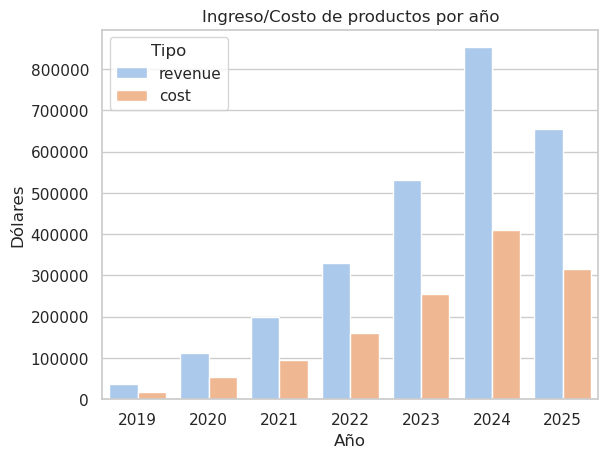

In [89]:
ax = sns.barplot(data=df_q_melt, x='year', y='value', hue='type')
ax.legend(title='Tipo')
plt.xlabel('Año')
plt.ylabel('Dólares')
plt.title('Ingreso/Costo de productos por año');

- Los ingresos han ido aumentando considerablemente cada año
- Los costos se mantienen alrededor de la mitad de los ingresos por cada año
- El año 2024 ha sido el año con mayores ingresos
- Siguen el patrón del gráfico de ordenes completadas por año

## Cuál es la categoría de productos que más se ha vendido?

In [90]:
q = f"""
SELECT
    p.category,
    ROUND(SUM(oi.sale_price), 2) AS sales
FROM `{order_items_table}` AS oi
INNER JOIN `{products_table}` AS p
ON p.id = oi.product_id
WHERE status = 'Complete'
GROUP BY p.category
ORDER BY sales DESC
"""
df_q = get_query(q)

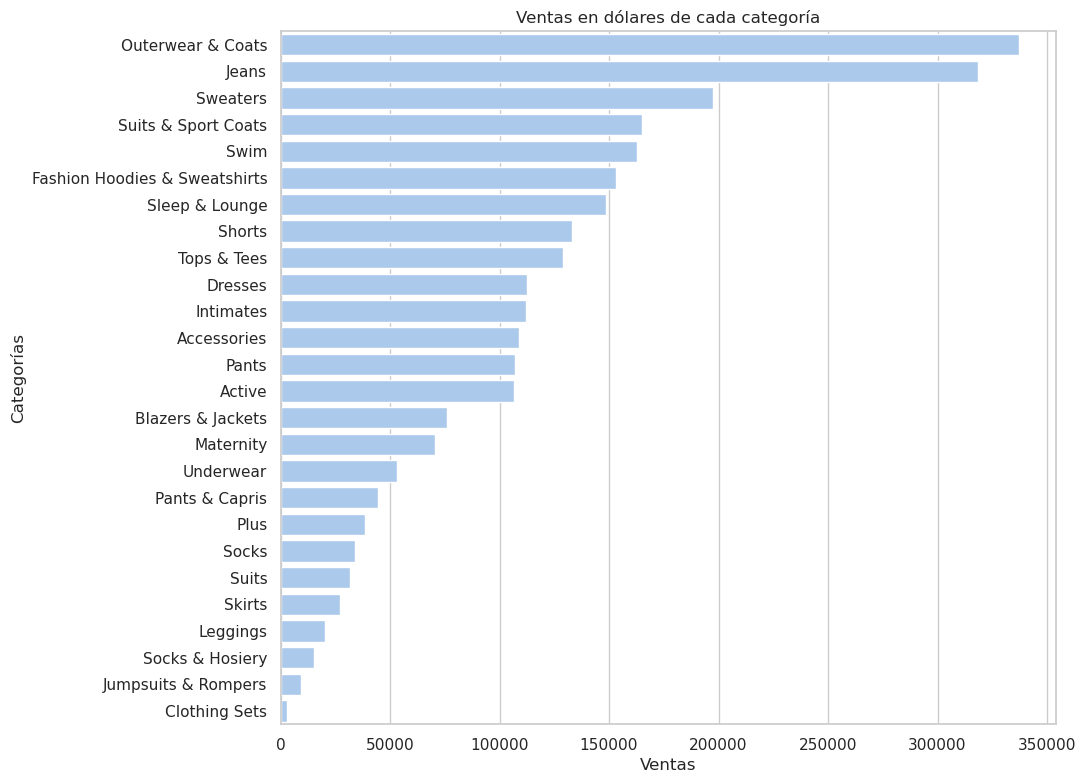

In [95]:
plt.figure(figsize=(10, 9))
plt.ylabel('Categorías')
plt.xlabel('Ventas')
plt.title('Ventas en dólares de cada categoría')
sns.barplot(df_q, y='category', x='sales');

- `Outerwear & Coats`, junto con los `Jeans`, son las productos más vendidos por lejos

## Cuál categoría fue la más vendida por año?

In [28]:
q = f"""
WITH category_sales_by_year AS (
    SELECT 
        EXTRACT(YEAR FROM oi.created_at) AS year,
        p.category,
        ROUND(SUM(oi.sale_price), 2) AS sales
    FROM `{order_items_table}` AS oi
    INNER JOIN `{products_table}` AS p
    ON p.id = oi.product_id
    WHERE oi.status = 'Complete'
    GROUP BY year, p.category
),
ranked_categories AS (
    SELECT *,
           ROW_NUMBER() OVER (PARTITION BY year ORDER BY sales DESC) AS rn
    FROM category_sales_by_year
)
SELECT year, category, sales
FROM ranked_categories
WHERE rn < 3
ORDER BY year;
"""
df_q = get_query(q)

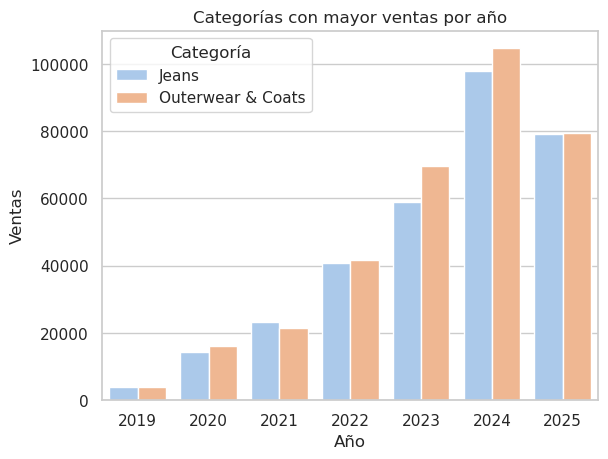

In [29]:
sns.barplot(data=df_q, x='year', y='sales', hue='category')
plt.legend(title='Categoría')
plt.title('Categorías con mayor ventas por año')
plt.xlabel('Año')
plt.ylabel('Ventas');

- Como se sabe `Jeans` y `Outerwear & Coats` son la categoría más vendida.
- Las ventas en cada año han sido casi parejas entre estas 2 categorías

## Cuál es el género que más compra?

In [30]:
q = f"""
SELECT 
    u.gender,
    SUM(oi.sale_price) AS sales
FROM `{order_items_table}` AS oi
INNER JOIN `{users_table}` AS u
ON u.id = oi.user_id
WHERE oi.status = 'Complete'
GROUP BY u.gender
ORDER BY sales
"""
df_q = get_query(q)

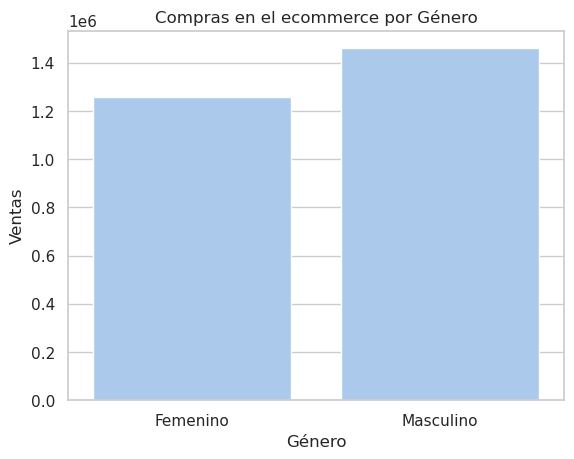

In [31]:
sns.barplot(df_q, x='gender', y='sales');
plt.ylabel('Ventas')
plt.xlabel('Género');
plt.xticks(ticks=np.arange(2), labels=['Femenino', 'Masculino']);
plt.title('Compras en el ecommerce por Género');

- Los hombres son los usuarios que más ingresos genera para el negocio.

## Cuál es la categoría más comprada por género?

In [97]:
q = f"""
WITH users_by_category_sales AS (
    SELECT 
        u.gender,
        p.category,
        SUM(oi.sale_price) AS sales,
    FROM `{order_items_table}` AS oi
    INNER JOIN `{products_table}` AS p
    ON p.id = oi.product_id
    INNER JOIN `{users_table}` AS u
    ON u.id = oi.user_id
    WHERE status = 'Complete'
    GROUP BY u.gender, p.category
),
ranked_category AS (
    SELECT *,
        ROW_NUMBER() OVER (PARTITION BY gender ORDER BY sales DESC) AS rn
    FROM users_by_category_sales
)
SELECT 
    gender,
    category,
    ROUND(sales, 2) AS sales
FROM ranked_category
WHERE rn < 5
"""
df_q = get_query(q)

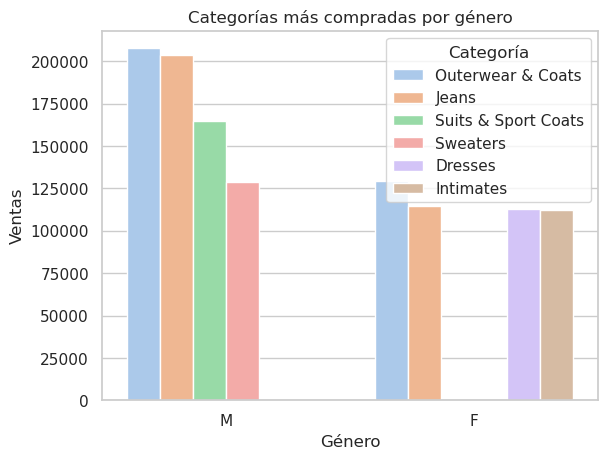

In [98]:
sns.barplot(df_q, x='gender', y='sales', hue='category')
plt.legend(title='Categoría')
plt.title('Categorías más compradas por género')
plt.xlabel('Género')
plt.ylabel('Ventas');

- Los hombres compran más `Outerwear & Coats` y  `Jeans`
- Las mujeres compran más `Jeans`, `Intimates`, `Outerwear & Coats` y `Dresses` con casi la misma proporción entre ellos

## Cuántos usuarios por grupo de edad existen?

In [103]:
q = f"""
SELECT
    CASE
        WHEN age BETWEEN 12 AND 17 THEN 'adolescent'
        WHEN age BETWEEN 18 AND 39 THEN 'young adult'
        WHEN age BETWEEN 40 AND 64 THEN 'adult'
        WHEN age >= 65 THEN 'senior'
    END AS age_group,
    COUNT(*) AS count
FROM `{users_table}` AS u
GROUP BY age_group
ORDER BY count DESC
"""
df_q = get_query(q)

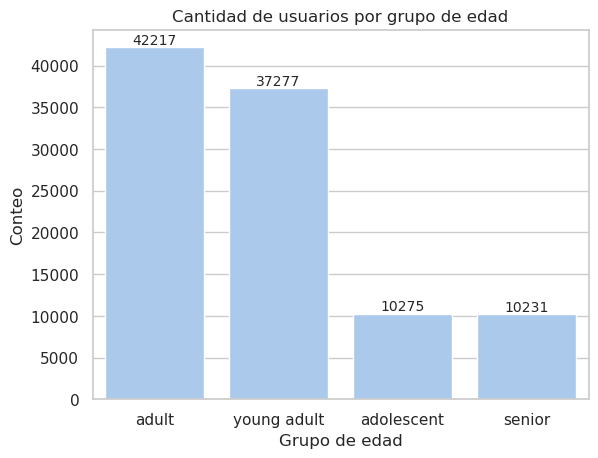

In [104]:
ax = sns.barplot(df_q, x='age_group', y='count')
ax.bar_label(ax.containers[0], fontsize=10);
plt.title('Cantidad de usuarios por grupo de edad')
plt.xlabel('Grupo de edad')
plt.ylabel('Conteo');

- Los `adultos` y `jóvenes` son el grupo de usuario con mayor registro en el negocio
- Los `adolescentes` y `adultos mayores` son el grupo con menos usuarios en el negocio

## Cuántos usuarios realizaron por lo menos una compra y cuántos no?

In [109]:
q = f"""
SELECT
    CASE
        WHEN oi.user_id IS NULL THEN 'no order'
        ELSE 'with order'
    END AS with_order,
    COUNT(DISTINCT u.id) AS count
FROM `{users_table}` AS u
LEFT JOIN `{order_items_table}` AS oi
ON u.id = oi.user_id
GROUP BY with_order
ORDER BY count
"""
df_q = get_query(q)

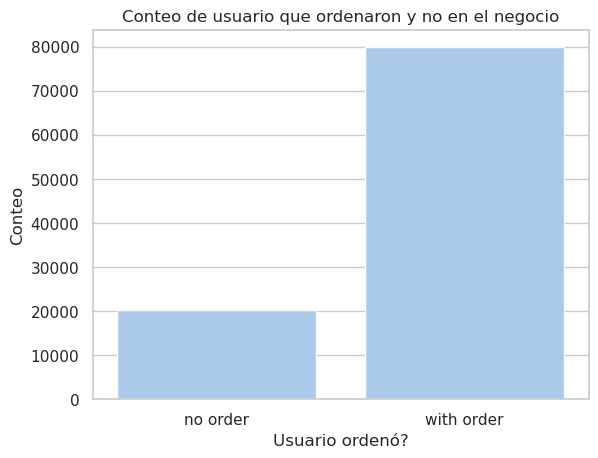

In [113]:
sns.barplot(df_q, x='with_order', y='count');
plt.xlabel('Usuario ordenó?')
plt.ylabel('Conteo')
plt.title('Conteo de usuario que ordenaron y no en el negocio');

- El 80% de usuarios registrados han realizado por lo menos una compra
- El 20% no ha realizado ninguna

## Cuál es el grupo de edad que más compra?

In [116]:
q = f"""
SELECT
    CASE
        WHEN u.age BETWEEN 12 AND 17 THEN 'adolescent'
        WHEN u.age BETWEEN 18 AND 39 THEN 'young adult'
        WHEN u.age BETWEEN 40 AND 64 THEN 'adult'
        WHEN u.age >= 65 THEN 'senior'
    END AS age_group,
    SUM(oi.sale_price) AS sales
FROM `{order_items_table}` AS oi
INNER JOIN `{users_table}` AS u
ON u.id = oi.product_id
WHERE oi.status = 'Complete'
GROUP BY age_group
ORDER BY sales
"""
df_q = get_query(q)

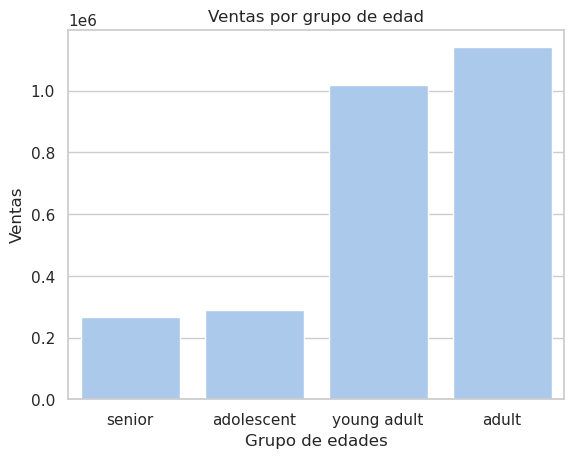

In [117]:
sns.barplot(df_q, x='age_group', y='sales')
plt.xlabel('Grupo de edades')
plt.ylabel('Ventas')
plt.title('Ventas por grupo de edad');

- Los adultos y jóvenes son los grupos de edad que más compran en el negocio
- Los adultos mayores y adolescentes son los que menos compran
- Se puede buscar estrategias para aumentar el grupo de adolescentes

## Cuál es la categoría que más se compra por grupo de edades?

In [38]:
q = f"""
WITH age_by_category_sales AS (
    SELECT
        u.age,
        p.category,
        SUM(oi.sale_price) AS sales
    FROM `{order_items_table}` AS oi
    INNER JOIN `{users_table}` AS u
    ON u.id = oi.user_id
    INNER JOIN `{products_table}` AS p
    ON p.id = oi.product_id
    WHERE oi.status = 'Complete'
    GROUP BY u.age, p.category
),
ranked_age_category AS (
    SELECT *,
    ROW_NUMBER() OVER (PARTITION BY age ORDER BY sales DESC) as rn
    FROM age_by_category_sales
)
SELECT
    CASE
        WHEN age BETWEEN 12 AND 17 THEN 'adolescent'
        WHEN age BETWEEN 18 AND 39 THEN 'young adult'
        WHEN age BETWEEN 40 AND 64 THEN 'adult'
        WHEN age >= 65 THEN 'senior'
    END AS age_group,
    category,
    ROUND(SUM(sales),2) AS sales,
FROM ranked_age_category
WHERE rn < 3
GROUP BY age_group, category
ORDER BY age_group, sales DESC
"""
df_q = get_query(q)

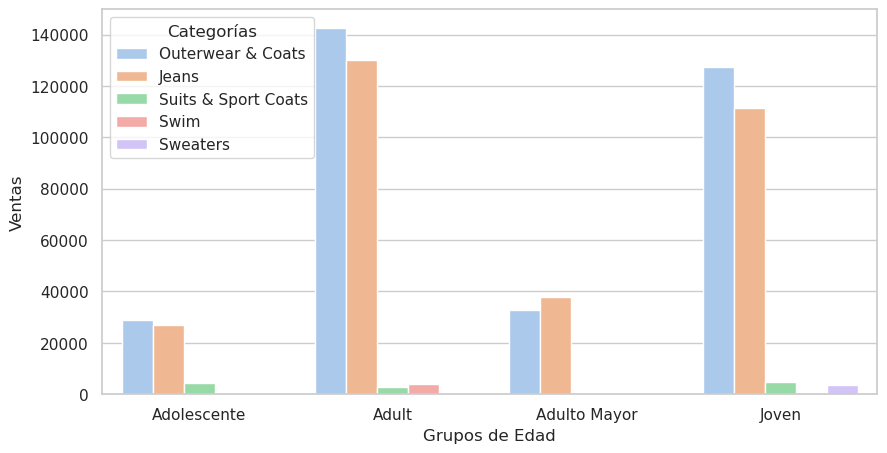

In [39]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df_q, x='age_group', y='sales', hue='category');
plt.xlabel('Grupos de Edad')
plt.ylabel('Ventas')
plt.xticks(ticks=np.arange(4), labels=['Adolescente', 'Adult', 'Adulto Mayor', 'Joven'])
plt.legend(title='Categorías');

- Los adultos (40 - 64 años) y jóvenes (18 - 39 años) son la población de usuarios que más compran realizan.
- `Outerwear & Coats` y `Jeans` son las categorías que más se compran en todos los grupos.

## Cuál es el país que más ingreso genera?

In [40]:
q = f"""
SELECT
    u.country,
    SUM(oi.sale_price) AS sales,
FROM `{order_items_table}` AS oi
INNER JOIN `{users_table}` AS u
ON u.id = oi.user_id
WHERE oi.status = 'Complete'
GROUP BY u.country
ORDER BY sales DESC
"""
df_q = get_query(q)

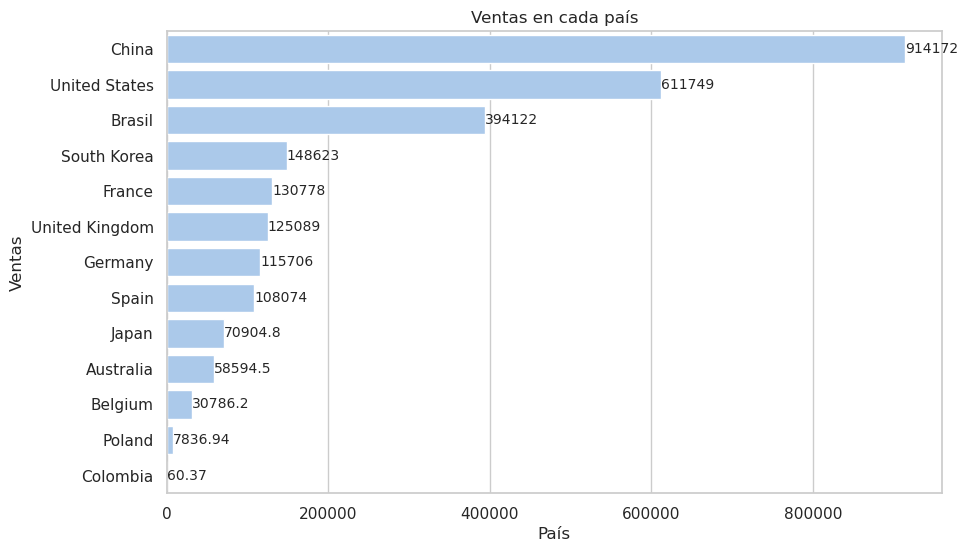

In [41]:
plt.figure(figsize=(10, 6))
plt.xlabel('País')
plt.ylabel('Ventas')
plt.title('Ventas en cada país')
ax = sns.barplot(df_q, y='country', x='sales');
ax.bar_label(ax.containers[0], fontsize=10);

- `China`, `United States` y `Brasil` son los paises donde se realizan más ventas por diferencia.

## Cuál es el grupo de edad con más presencia por país?

In [118]:
q = f"""
WITH country_by_age_group AS
(
SELECT
    country,
    CASE
        WHEN age BETWEEN 12 AND 17 THEN 'adolescent'
        WHEN age BETWEEN 18 AND 39 THEN 'young adult'
        WHEN age BETWEEN 40 AND 64 THEN 'adult'
        WHEN age >= 65 THEN 'senior'
    END AS age_group,
    COUNT(*) AS count
FROM `{users_table}`
GROUP BY country, age_group
),
ranked_country AS (
SELECT *,
    ROW_NUMBER() OVER (PARTITION BY country ORDER BY count DESC) as rn
FROM country_by_age_group
)
SELECT
    country,
    age_group,
    count
FROM ranked_country
WHERE rn < 3
ORDER BY count DESC
"""
df_q = get_query(q)

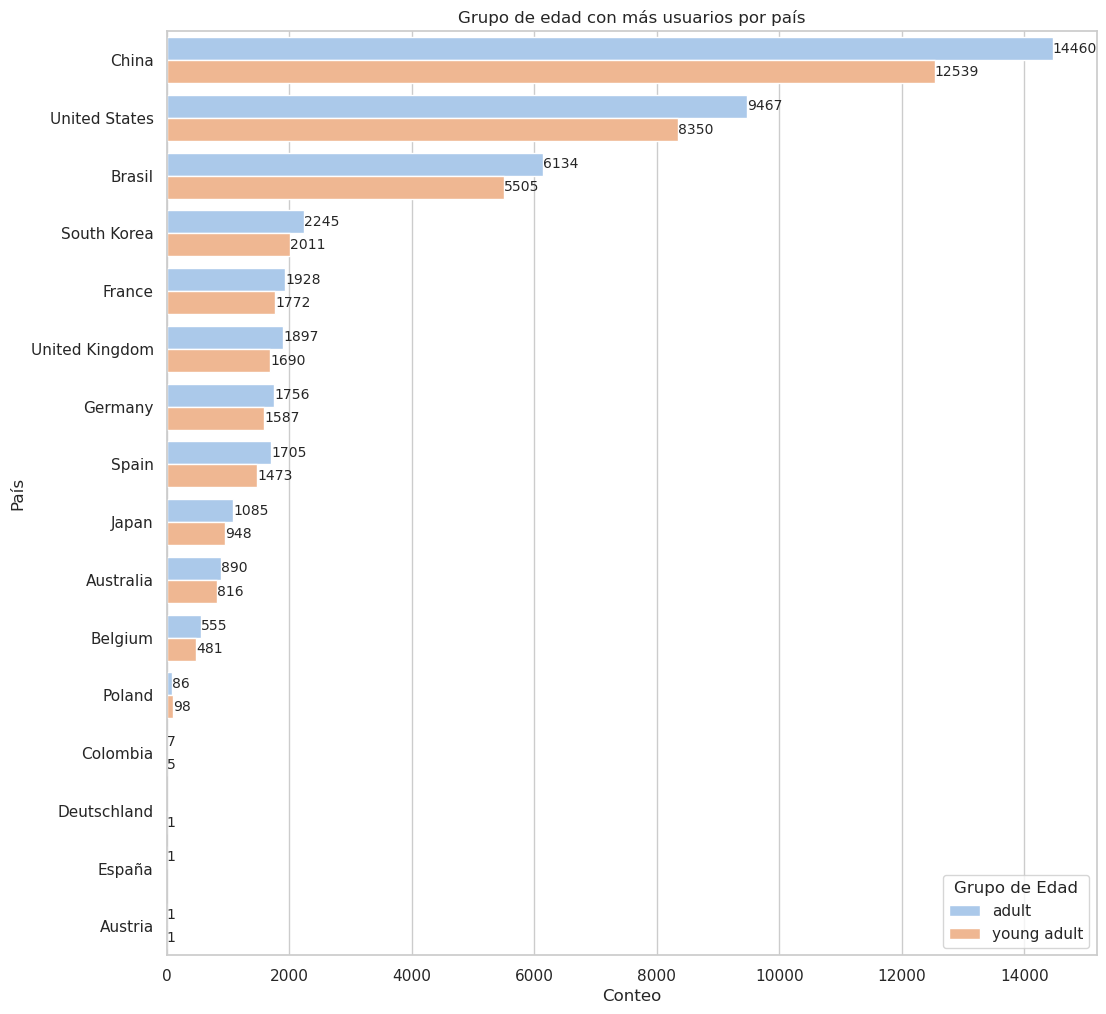

In [120]:
plt.figure(figsize=(12, 12))
plt.title('Grupo de edad con más usuarios por país')
plt.xlabel('Conteo')
plt.ylabel('País')
ax = sns.barplot(df_q, y='country', x='count', hue='age_group');
ax.bar_label(ax.containers[0], fontsize=10);
ax.bar_label(ax.containers[1], fontsize=10);
plt.legend(title='Grupo de Edad', loc='lower right');

- Los `adultos` y `jóvenes` dominan en la mayoría de países con mayor presencia de usuarios

## Cuál es la categoría con más venta por país?

In [137]:
q = f"""
WITH country_by_category_sales AS(
    SELECT 
        u.country,
        p.category,
        SUM(oi.sale_price) AS sales
    FROM `{order_items_table}` AS oi
    INNER JOIN `{users_table}` AS u
    ON u.id = oi.user_id
    INNER JOIN `{products_table}` AS p
    ON p.id = oi.product_id
    WHERE oi.status = 'Complete'
    GROUP BY country, category
),
ranked_country AS (
    SELECT *,
        ROW_NUMBER() OVER (PARTITION BY country ORDER BY sales DESC) AS rn
    FROM country_by_category_sales
)
SELECT
    country,
    category,
    sales
FROM ranked_country
WHERE rn = 1
ORDER BY sales DESC
"""
df_q = get_query(q)

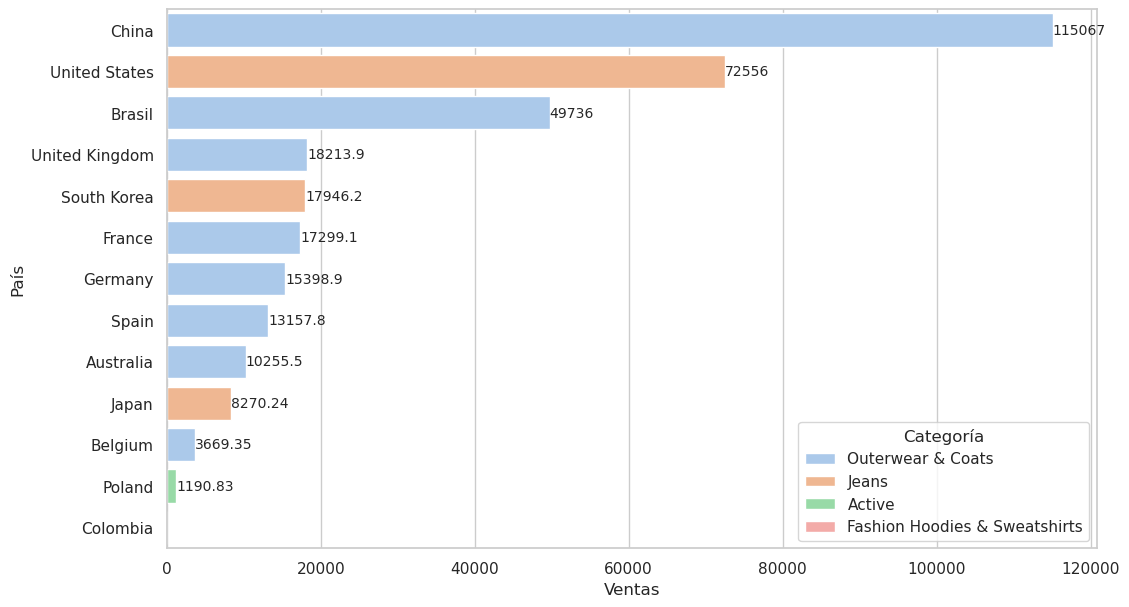

In [138]:
plt.figure(figsize=(12, 7))
plt.xlabel('Ventas')
plt.ylabel('País')
ax = sns.barplot(df_q, y='country', x='sales', hue='category');
ax.bar_label(ax.containers[0], fontsize=10);
ax.bar_label(ax.containers[1], fontsize=10);
ax.bar_label(ax.containers[2], fontsize=10);
ax.legend(title='Categoría');

- Las categorías `Outerwear & Coats` y `Jeans` son las que dominan más en cada país.
- En `Poland` domina más la categoría `Active`

## Cuál es el origen de tráfico en cada país?

In [130]:
q = f"""
WITH traffic_source_by_country AS(
SELECT
    country,
    traffic_source,
    COUNT(traffic_source) AS count
FROM `{users_table}` u
GROUP BY country, traffic_source
),
ranked_traffic AS (
SELECT *,
    ROW_NUMBER() OVER (PARTITION BY country ORDER BY count DESC) AS rn
FROM traffic_source_by_country
)
SELECT
    country,
    traffic_source,
    count
FROM ranked_traffic
WHERE rn < 3
ORDER BY count DESC
"""
df_q = get_query(q)

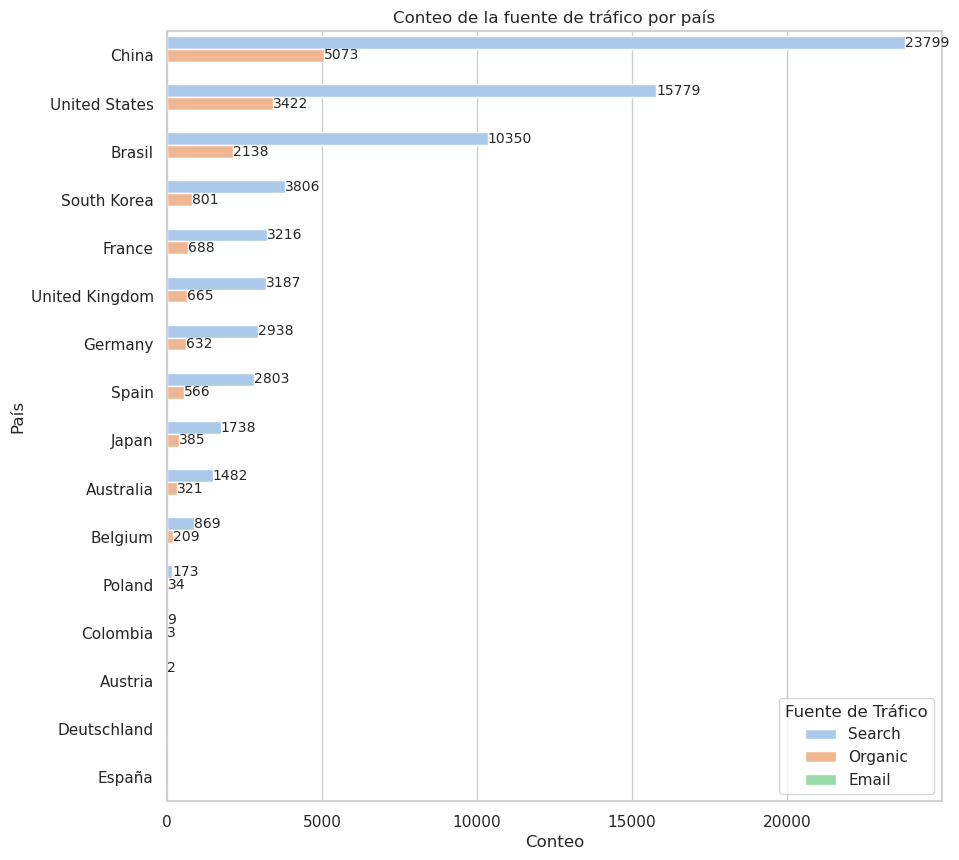

In [136]:
plt.figure(figsize=(10, 10))
plt.xlabel('Conteo')
plt.ylabel('País')
plt.title('Conteo de la fuente de tráfico por país')
ax = sns.barplot(df_q, x='count', y='country', hue='traffic_source');
ax.legend(title='Fuente de Tráfico', loc='lower right')
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10);

- La fuente de tráfico `search` es la que domina en casi todos los países.

## Cuál es el origen de tráfico por grupo de edad?

In [127]:
q = f"""
WITH traffic_source_by_age_group AS(
SELECT
    CASE
        WHEN age BETWEEN 12 AND 17 THEN 'adolescent'
        WHEN age BETWEEN 18 AND 39 THEN 'young adult'
        WHEN age BETWEEN 40 AND 64 THEN 'adult'
        WHEN age >= 65 THEN 'senior'
    END AS age_group,
    traffic_source,
    COUNT(traffic_source) AS count
FROM `{users_table}` u
GROUP BY age_group, traffic_source
),
ranked_traffic AS (
SELECT *,
    ROW_NUMBER() OVER (PARTITION BY age_group ORDER BY count DESC) AS rn
FROM traffic_source_by_age_group
)
SELECT
    age_group,
    traffic_source,
    count
FROM ranked_traffic
WHERE rn < 3
ORDER BY count DESC
"""
df_q = get_query(q)

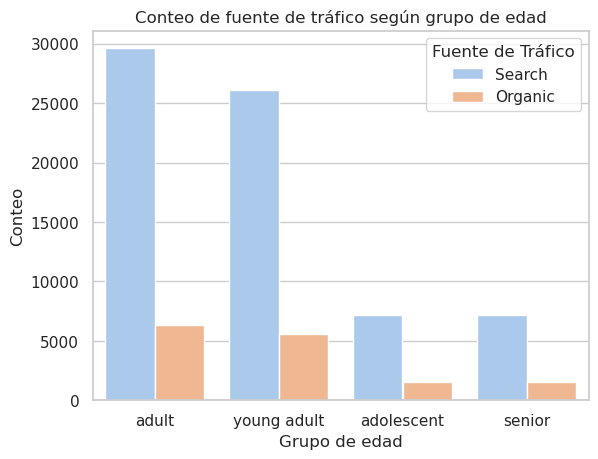

In [128]:
plt.xlabel('Grupo de edad');
plt.ylabel('Conteo');
plt.title('Conteo de fuente de tráfico según grupo de edad')
sns.barplot(df_q, x='age_group', y='count', hue='traffic_source');
plt.legend(title='Fuente de Tráfico');

- El tráfico obtenido mediante `Search` es independiente a los grupos de edad.